In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [2]:
iris_data = load_iris().data
iris_target = load_iris().target
iris = np.concatenate([iris_data, iris_target[:,np.newaxis]], axis=1)

train_data, test_data = train_test_split(iris, test_size=0.1)

In [3]:
train_loader = DataLoader(train_data, batch_size=8, shuffle=True)
test_loader = DataLoader(test_data, batch_size=8)

In [4]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(4, 32)
        self.linear2 = nn.Linear(32, 16)
        self.linear3 = nn.Linear(16, 3)
        
    def forward(self, x):
        out = self.linear1(x)
        out = self.linear2(out)
        out = self.linear3(out)
        
        return out

In [5]:
net = Net()
optimizer = torch.optim.Adam(net.parameters())
criterion = nn.CrossEntropyLoss()

In [6]:
train_loss_, test_loss_, train_acc_, test_acc_ = [], [], [], []

for epoch in range(1, 21):
    total, correct, train_loss = 0, 0, 0
    net.train()
    for batch, data in enumerate(train_loader):
        inputs = data[:,:-1].float()
        targets = data[:,-1].long()
        
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
        _, predicted = outputs.max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()
    
    print('Epoch : ', epoch,
          'Train_Loss : ', train_loss/(batch+1),
          'Train_Acc : ', 100.*correct/total)
    
    train_loss_.append(train_loss/(batch+1))
    train_acc_.append(100.*correct/total)
    
    total, correct, test_loss = 0, 0, 0
    net.eval()
    with torch.no_grad():
        for batch, data in enumerate(test_loader):
            inputs = data[:,:-1].float()
            targets = data[:,-1].long()
            
            outputs = net(inputs)
            loss = criterion(outputs, targets)
            
            test_loss += loss.item()
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()
    
    print('Test Loss : ', test_loss/(batch+1),
          'Test_Acc : ', 100.*correct/total)
    
    test_loss_.append(test_loss/(batch+1))
    test_acc_.append(100.*correct/total)

Epoch :  1 Train_Loss :  1.0433818101882935 Train_Acc :  38.51851851851852
Test Loss :  0.9615925252437592 Test_Acc :  60.0
Epoch :  2 Train_Loss :  0.8829365618088666 Train_Acc :  66.66666666666667
Test Loss :  0.8554639220237732 Test_Acc :  60.0
Epoch :  3 Train_Loss :  0.7654269688269671 Train_Acc :  71.85185185185185
Test Loss :  0.7498616576194763 Test_Acc :  93.33333333333333
Epoch :  4 Train_Loss :  0.6560421305544236 Train_Acc :  70.37037037037037
Test Loss :  0.6643940806388855 Test_Acc :  66.66666666666667
Epoch :  5 Train_Loss :  0.56546950340271 Train_Acc :  88.88888888888889
Test Loss :  0.592229425907135 Test_Acc :  93.33333333333333
Epoch :  6 Train_Loss :  0.501031921190374 Train_Acc :  73.33333333333333
Test Loss :  0.5375711619853973 Test_Acc :  93.33333333333333
Epoch :  7 Train_Loss :  0.45027060193174023 Train_Acc :  89.62962962962963
Test Loss :  0.48743875324726105 Test_Acc :  93.33333333333333
Epoch :  8 Train_Loss :  0.4133537911316928 Train_Acc :  91.851851851

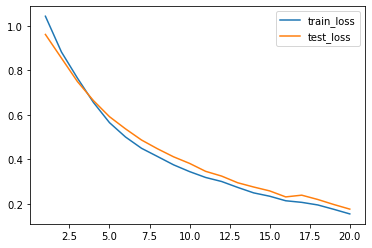

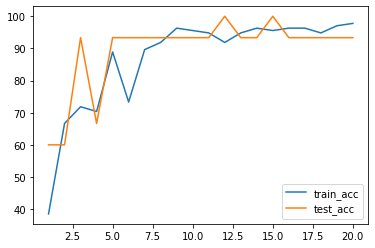

In [7]:
plt.plot(range(1,21), train_loss_, label='train_loss')
plt.plot(range(1,21), test_loss_, label='test_loss')
plt.legend()
plt.show()

plt.plot(range(1,21), train_acc_, label='train_acc')
plt.plot(range(1,21), test_acc_, label='test_acc')
plt.legend()
plt.show()